In [8]:
import os
from src import *
from src.data_classes.adult_data import *
from src.data_classes.compas_data import *
from typing import List, Dict
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [23]:
data = AdultData()
m = Metrics(data._X, data._y, data._y, lambda _:data._y)
print(m.df(['sex']))
print(m.df(['race']))
print(m.df(['sex','race']))
print(m.sf(['sex']))
print(m.sf(['race']))
print(m.sf(['sex','race']))

def get_true_probs(m, attr = 'sex'):
    subgroups = m._get_subgroup_indices([attr])
    pos_v_size = [] 
    
    for subgroup in subgroups:
        sg_cm = m._confusion_matrix(subgroup)
        group_size = len(subgroup)

        if group_size!=0:
            PY1_sg = sg_cm['p'] / group_size
            P_sg = group_size / m._data_size
            pos_v_size.append((PY1_sg, P_sg))
    return pos_v_size

get_true_probs(m)

1.0271593066283586
0.5169302122698858
1.4990564980501873
0.04344951762080798
0.012857140446589055
0.045198782148273345
0.10946058861758426 0.33079450876815825
0.3057365764111978 0.6692054912318418


[(0.10946058861758426, 0.33079450876815825),
 (0.3057365764111978, 0.6692054912318418)]

In [24]:
import numpy




def best_case_cm(p, t, mult):
    tp = min(p, t)
    tn = min(1-p, 1-t)
    fp = max(0, t-p)
    fn = 1 - tp - tn - fp
    return tp*mult, tn*mult, fp*mult, fn*mult

def best_case_f1(p1, p0, t1, t0, s1, s0):
    tp0, tn0, fp0, fn0 = best_case_cm(p0,t0,s0)
    tp1, tn1, fp1, fn1 = best_case_cm(p1,t1,s1)
    
    f1 = (tp0+tp1) / ((tp0+tp1)+0.5*(fp0+fp1+fn1+fn0))
    return f1

def get_sf(p1, p0, t1, t0, s1, s0):
    P = s1*p1 + s0*p0
    
    sf0 = abs(P-p0)*s0
    sf1 = abs(P-p1)*s1
    
    return max(sf0, sf1)


def try_all(t1, t0, s1, s0, n=100):
    f = []
    s = []
    min_t = min(t1,t0)
    max_t = max(t1,t0)
    for p1 in numpy.linspace(min_t, max_t, num=n):
        for p0 in numpy.linspace(min_t, max_t, num=n):
            sf = get_sf(p1, p0, t1, t0, s1, s0)
            f1 = best_case_f1(p1, p0, t1, t0, s1, s0)
            s.append(sf)
            f.append(f1)
    return f, s
            
        
probs = get_true_probs(m)
f, s = try_all(probs[1][0], probs[0][0], probs[1][1], probs[0][1])

0.10946058861758426 0.33079450876815825
0.3057365764111978 0.6692054912318418


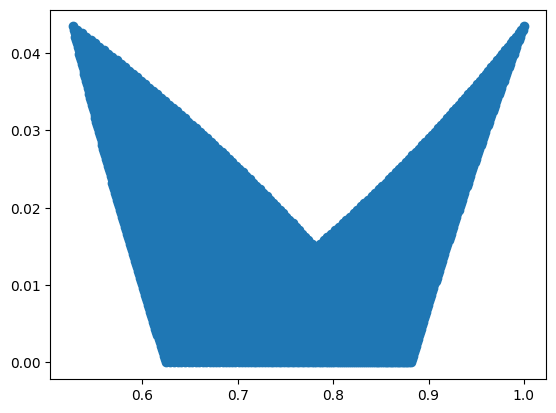

In [25]:
plt.scatter(f,s)

In [9]:
raw_data = AdultData()._raw
raw_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Probability'],
      dtype='object')

In [10]:
unique_values_count = raw_data.nunique()

# Display the result
print(unique_values_count)

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
Probability           2
dtype: int64


In [11]:
data = AdultData()._X

num_rows, num_columns = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


data = AdultData()._untransformed_cols

num_rows, num_columns = data.shape

print("Number of cols before one hot:", num_columns)

Number of rows: 32561
Number of columns: 25
Number of cols before one hot: 11


In [12]:
unique_values_count = data.nunique()

# Display the result
print(unique_values_count)

age                73
workclass           7
education-num      16
marital-status      2
occupation          6
relationship        4
race                2
sex                 2
capital-gain      119
capital-loss       92
hours-per-week     94
dtype: int64


In [13]:
intersection_counts = AdultData().dataset_orig.groupby(['sex', 'race', 'Probability']).size().reset_index(name='count')

intersection_counts['%'] = intersection_counts['count']/num_rows *100

# Display the result
print("Intersection Counts:")
print(intersection_counts)


Intersection Counts:
   sex  race  Probability  count          %
0    0     0            0   1978   6.074752
1    0     0            1    151   0.463745
2    0     1            0   7614  23.383803
3    0     1            1   1028   3.157151
4    1     0            0   2043   6.274377
5    1     0            1    573   1.759774
6    1     1            0  13085  40.186112
7    1     1            1   6089  18.700286


In [14]:
data = AdultData().dataset_orig


# description of the dataset
#https://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

#https://www.kaggle.com/datasets/uciml/adult-census-income 

In [15]:
# workclass
intersection_counts = pd.crosstab(data['workclass'], data['Probability'])

# Display the result
print("Intersection Counts:")
print(intersection_counts)

ratio_y_to_x = intersection_counts[0] / intersection_counts[1]

# Display the result
print("Ratio between counts of 'Y' and 'X' for each category in 'Category1':")
print(ratio_y_to_x)

"""
colclusion: 
[Never-worked, Without-pay] -> ?
[Local-gov, State-gov] -> Non-federal-gov
"""

Intersection Counts:
Probability           0     1
workclass                    
?                  1645   191
Federal-gov         589   371
Local-gov          1476   617
Never-worked          7     0
Private           17733  4963
Self-emp-inc        494   622
Self-emp-not-inc   1817   724
State-gov           945   353
Without-pay          14     0
Ratio between counts of 'Y' and 'X' for each category in 'Category1':
workclass
?                   8.612565
Federal-gov         1.587601
Local-gov           2.392220
Never-worked             inf
Private             3.573040
Self-emp-inc        0.794212
Self-emp-not-inc    2.509669
State-gov           2.677054
Without-pay              inf
dtype: float64


'\ncolclusion: \n[Never-worked, Without-pay] -> ?\n[Local-gov, State-gov] -> Non-federal-gov\n'

In [16]:
intersection_counts = pd.crosstab(data['education'], data['education-num'])

# Display the result
print("Intersection Counts:")
print(intersection_counts)


"""
colclusion: 
remove education
"""


Intersection Counts:
education-num  1    2    3    4    5    6     7    8      9     10    11  \
education                                                                  
10th            0    0    0    0    0  933     0    0      0     0     0   
11th            0    0    0    0    0    0  1175    0      0     0     0   
12th            0    0    0    0    0    0     0  433      0     0     0   
1st-4th         0  168    0    0    0    0     0    0      0     0     0   
5th-6th         0    0  333    0    0    0     0    0      0     0     0   
7th-8th         0    0    0  646    0    0     0    0      0     0     0   
9th             0    0    0    0  514    0     0    0      0     0     0   
Assoc-acdm      0    0    0    0    0    0     0    0      0     0     0   
Assoc-voc       0    0    0    0    0    0     0    0      0     0  1382   
Bachelors       0    0    0    0    0    0     0    0      0     0     0   
Doctorate       0    0    0    0    0    0     0    0      0     0 

'\ncolclusion: \nremove education\n'

In [17]:
intersection_counts = pd.crosstab(data['marital-status'], data['Probability'])

# Display the result
print("Intersection Counts:")
print(intersection_counts)

ratio_y_to_x = intersection_counts[0] / intersection_counts[1]

# Display the result
print("Ratio between counts of 'Y' and 'X' for each category in 'Category1':")
print(ratio_y_to_x)

"""
Married-AF-spouse  Married-civ-spouse  -> 1
others -> 0
"""


Intersection Counts:
Probability                0     1
marital-status                    
Divorced                3980   463
Married-AF-spouse         13    10
Married-civ-spouse      8284  6692
Married-spouse-absent    384    34
Never-married          10192   491
Separated                959    66
Widowed                  908    85
Ratio between counts of 'Y' and 'X' for each category in 'Category1':
marital-status
Divorced                  8.596112
Married-AF-spouse         1.300000
Married-civ-spouse        1.237896
Married-spouse-absent    11.294118
Never-married            20.757637
Separated                14.530303
Widowed                  10.682353
dtype: float64


'\nMarried-AF-spouse  Married-civ-spouse  -> 1\nothers -> 0\n'

In [18]:
intersection_counts = pd.crosstab(data['occupation'], data['Probability'])

# Display the result
print("Intersection Counts:")
print(intersection_counts)

ratio_y_to_x = intersection_counts[0] / intersection_counts[1]

# Display the result
print("Ratio between counts of 'Y' and 'X' for each category in 'Category1':")
print(ratio_y_to_x)


Intersection Counts:
Probability           0     1
occupation                   
?                  1652   191
Adm-clerical       3263   507
Armed-Forces          8     1
Craft-repair       3170   929
Exec-managerial    2098  1968
Farming-fishing     879   115
Handlers-cleaners  1284    86
Machine-op-inspct  1752   250
Other-service      3158   137
Priv-house-serv     148     1
Prof-specialty     2281  1859
Protective-serv     438   211
Sales              2667   983
Tech-support        645   283
Transport-moving   1277   320
Ratio between counts of 'Y' and 'X' for each category in 'Category1':
occupation
?                      8.649215
Adm-clerical           6.435897
Armed-Forces           8.000000
Craft-repair           3.412271
Exec-managerial        1.066057
Farming-fishing        7.643478
Handlers-cleaners     14.930233
Machine-op-inspct      7.008000
Other-service         23.051095
Priv-house-serv      148.000000
Prof-specialty         1.227004
Protective-serv        2.075829
Sale

In [19]:
intersection_counts = pd.crosstab(data['marital-status'], data['relationship'])

# Display the result
print("Intersection Counts:")
print(intersection_counts)



intersection_counts = pd.crosstab(data['relationship'], data['Probability'])

# Display the result
print("Intersection Counts:")
print(intersection_counts)


ratio_y_to_x = intersection_counts[0] / intersection_counts[1]

# Display the result
print("Ratio between counts of 'Y' and 'X' for each category in 'Category1':")
print(ratio_y_to_x)

"""
Husband and wife straight up give away gender except for verrry few cases (3)!!!
Unmarried is also vey repetitive...

Only relative columns seem 
Other-relative   
Own-child  
Spouse (Husband/Wife)
None (THe rest)       

"""


Intersection Counts:
relationship           Husband  Not-in-family  Other-relative  Own-child  \
marital-status                                                             
Divorced                     0           2404             110        328   
Married-AF-spouse            9              0               1          1   
Married-civ-spouse       13184             17             124         95   
Married-spouse-absent        0            211              32         45   
Never-married                0           4706             611       4485   
Separated                    0            420              55         99   
Widowed                      0            547              48         15   

relationship           Unmarried  Wife  
marital-status                          
Divorced                    1601     0  
Married-AF-spouse              0    12  
Married-civ-spouse             0  1556  
Married-spouse-absent        130     0  
Never-married                881     0  
Separat

'\nHusband and wife straight up give away gender except for verrry few cases (3)!!!\nUnmarried is also vey repetitive...\n\nOnly relative columns seem \nOther-relative   \nOwn-child  \nSpouse (Husband/Wife)\nNone (THe rest)       \n\n'

In [20]:
intersection_counts = pd.crosstab(data['native-country'], data['race'])

# Display the result
print("Intersection Counts:")
print(intersection_counts)


ratio_y_to_x = intersection_counts[0] / intersection_counts[1]

# Display the result
print("Ratio between counts of 'Y' and 'X' for each category in 'Category1':")
print(ratio_y_to_x)

Intersection Counts:
race                           0      1
native-country                         
?                            197    386
Cambodia                      19      0
Canada                         2    119
China                         73      2
Columbia                       8     51
Cuba                           5     90
Dominican-Republic            31     39
Ecuador                        9     19
El-Salvador                    5    101
England                        9     81
France                         1     28
Germany                       13    124
Greece                         1     28
Guatemala                      4     60
Haiti                         44      0
Holand-Netherlands             0      1
Honduras                       1     12
Hong                          18      2
Hungary                        0     13
India                         92      8
Iran                           8     35
Ireland                        1     23
Italy              